In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from tensorflow.examples.tutorials.mnist import input_data


In [3]:
mnist = input_data.read_data_sets('datasets_lib/mnist/', one_hot=True)

Extracting datasets_lib/mnist/train-images-idx3-ubyte.gz
Extracting datasets_lib/mnist/train-labels-idx1-ubyte.gz
Extracting datasets_lib/mnist/t10k-images-idx3-ubyte.gz
Extracting datasets_lib/mnist/t10k-labels-idx1-ubyte.gz


In [28]:
batch_size = 64
z_dimension = 100
x_dimension = mnist.train.images.shape[1]
y_dimension = mnist.train.labels.shape[1]
num_hidden = 128


In [33]:
def xavier_init(size):
    avg = size[0]+ size[1] / 2.0
    xav_stddev = 1.0/ tf.sqrt(avg)
    return tf.random_normal(shape=size,stddev=xav_stddev)


In [56]:
# Discriminator net model
X = tf.placeholder(tf.float32,[None,x_dimension])
Y = tf.placeholder(tf.float32,[None,y_dimension])

d_w1 = tf.Variable(xavier_init([x_dimension+y_dimension,num_hidden]))
d_b1 = tf.Variable(tf.zeros([num_hidden]))

d_w2 = tf.Variable(xavier_init([num_hidden,1]))
d_b2 = tf.Variable(tf.zeros([1]))

discr_vars = [d_w1,d_b1,d_w2,d_b2]

def discriminator(x,y):
    inputs = tf.concat(values=[x,y],axis=1)
    d_h1 = tf.nn.relu(tf.matmul(inputs,d_w1)+d_b1)
    d_logit  = tf.matmul(d_h1,d_w2)+d_b2
    return d_logit


    

In [67]:
#Generator net model

Z = tf.placeholder(tf.float32,[None,z_dimension])

g_w1 = tf.Variable(xavier_init([z_dimension+ y_dimension,num_hidden]))
g_b1 = tf.Variable(tf.zeros([num_hidden]))

g_w2 = tf.Variable(xavier_init([num_hidden,x_dimension]))
g_b2 = tf.Variable(tf.zeros([x_dimension]))

gen_vars = [g_w1,g_b1,g_w2,g_b2]
def generator(z,y):
    inputs = tf.concat(axis=1,values=[z,y])
    g_h1 = tf.nn.relu(tf.matmul(inputs,g_w1)+g_b1)
    g_logit = tf.matmul(g_h1,g_w2)+g_b2
    g_prob = tf.nn.sigmoid(g_logit)
    return g_prob



In [58]:
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

In [59]:
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')
        
    return fig

In [68]:
g_sample = generator(Z, Y)
d_logit_real = discriminator(X, Y)
d_logit_fake = discriminator(g_sample, Y)

In [69]:
d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logit_real, labels=tf.ones_like(d_logit_real)))
d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logit_fake, labels=tf.zeros_like(d_logit_fake)))
d_loss = d_loss_real + d_loss_fake
g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logit_fake, labels=tf.ones_like(d_logit_fake)))


In [74]:
d_optimizer = tf.train.AdamOptimizer().minimize(d_loss, var_list=discr_vars)
g_optimizer = tf.train.AdamOptimizer().minimize(g_loss, var_list=gen_vars)




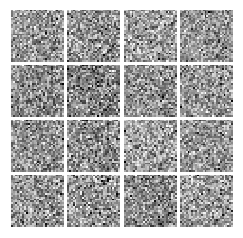

Iter: 0
D loss: 1.518
G_loss: 1.824
()


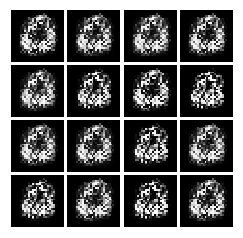

Iter: 1000
D loss: 0.01731
G_loss: 5.749
()


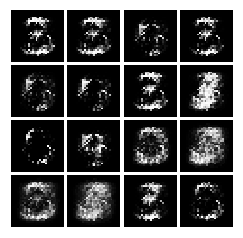

Iter: 2000
D loss: 0.1122
G_loss: 4.016
()


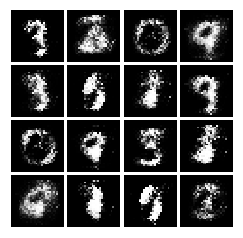

Iter: 3000
D loss: 0.09568
G_loss: 4.82
()


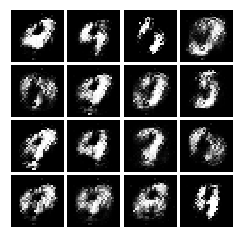

Iter: 4000
D loss: 0.08121
G_loss: 5.271
()


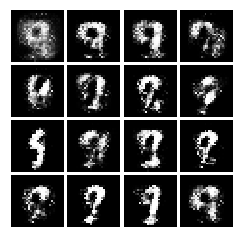

Iter: 5000
D loss: 0.3349
G_loss: 3.438
()


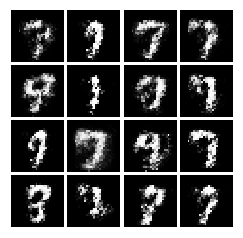

Iter: 6000
D loss: 0.5465
G_loss: 2.616
()


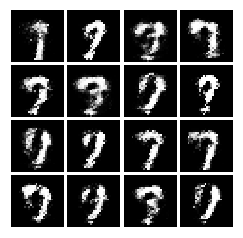

Iter: 7000
D loss: 0.6717
G_loss: 2.768
()


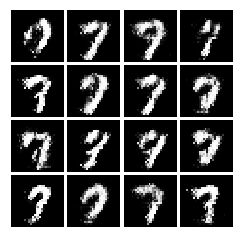

Iter: 8000
D loss: 0.6206
G_loss: 3.125
()


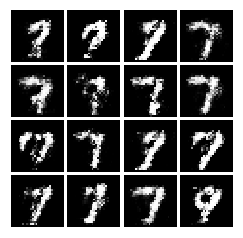

Iter: 9000
D loss: 0.4636
G_loss: 3.224
()


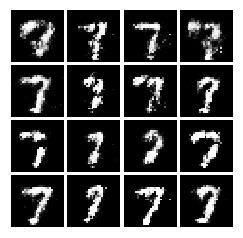

Iter: 10000
D loss: 0.8677
G_loss: 2.713
()


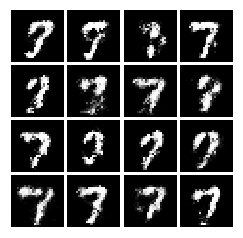

Iter: 11000
D loss: 0.5894
G_loss: 2.839
()


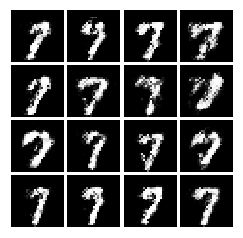

Iter: 12000
D loss: 0.5935
G_loss: 2.442
()


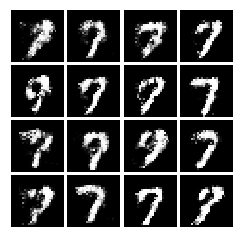

Iter: 13000
D loss: 0.919
G_loss: 2.089
()


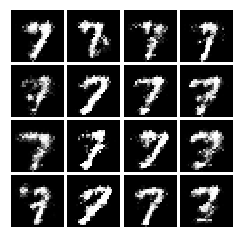

Iter: 14000
D loss: 0.9336
G_loss: 2.027
()


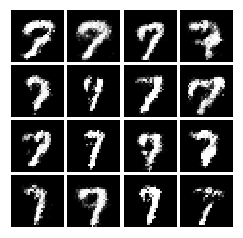

Iter: 15000
D loss: 0.738
G_loss: 1.896
()


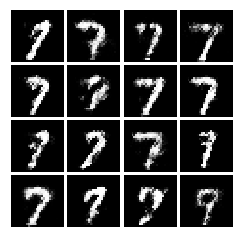

Iter: 16000
D loss: 0.9649
G_loss: 1.673
()


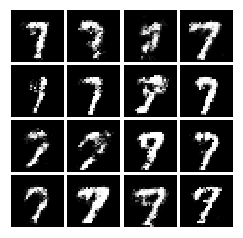

Iter: 17000
D loss: 0.7356
G_loss: 2.275
()


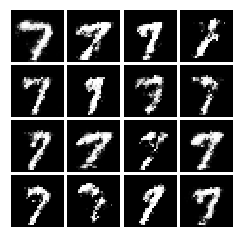

Iter: 18000
D loss: 1.086
G_loss: 1.525
()


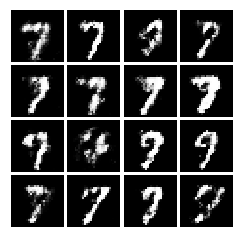

Iter: 19000
D loss: 1.15
G_loss: 1.609
()


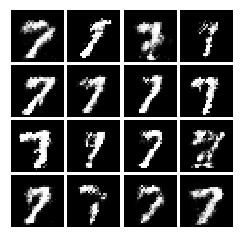

Iter: 20000
D loss: 1.058
G_loss: 2.212
()


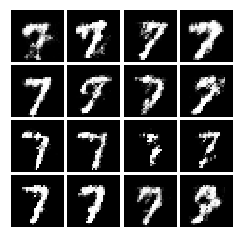

Iter: 21000
D loss: 0.7637
G_loss: 1.754
()


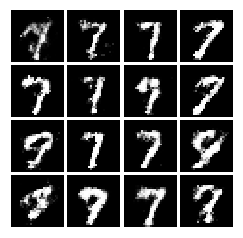

Iter: 22000
D loss: 1.06
G_loss: 1.549
()


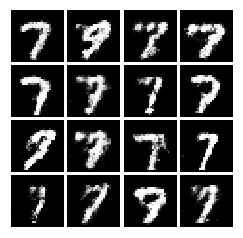

Iter: 23000
D loss: 0.9318
G_loss: 1.583
()


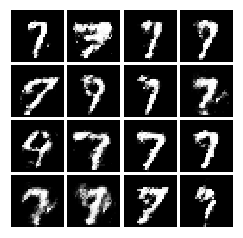

Iter: 24000
D loss: 1.038
G_loss: 1.922
()


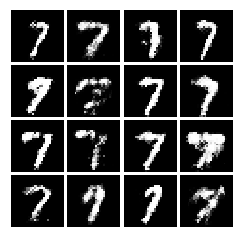

Iter: 25000
D loss: 0.7897
G_loss: 1.818
()


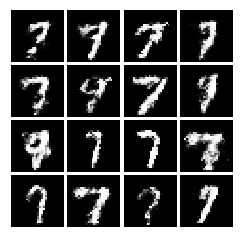

Iter: 26000
D loss: 0.9993
G_loss: 1.525
()


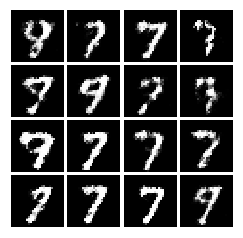

Iter: 27000
D loss: 0.9948
G_loss: 1.683
()


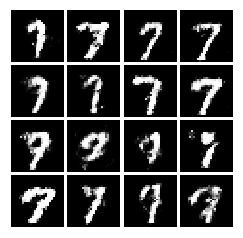

Iter: 28000
D loss: 1.005
G_loss: 1.582
()


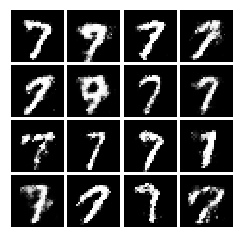

Iter: 29000
D loss: 0.928
G_loss: 1.654
()


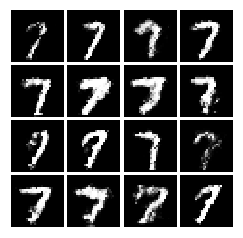

Iter: 30000
D loss: 1.024
G_loss: 1.632
()


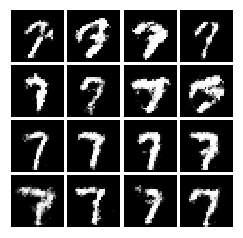

Iter: 31000
D loss: 1.0
G_loss: 1.747
()


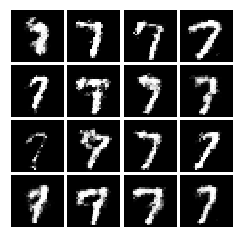

Iter: 32000
D loss: 1.009
G_loss: 1.678
()


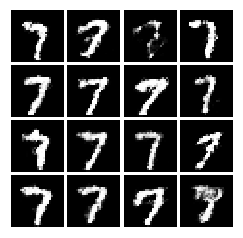

Iter: 33000
D loss: 0.817
G_loss: 1.499
()


KeyboardInterrupt: 

In [75]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
i = 0

for it in range(100000):
    if it % 1000 == 0:
        n_sample = 16

        z_sample = sample_Z(n_sample, z_dimension)
        y_sample = np.zeros(shape=[n_sample, y_dimension])
        y_sample[:, 7] = 1

        samples = sess.run(g_sample, feed_dict={Z: z_sample, Y:y_sample})

        fig = plot(samples)
        plt.show()
        
    x_mb, y_mb = mnist.train.next_batch(batch_size)

    z_sample = sample_Z(batch_size, z_dimension)
    _, d_loss_curr = sess.run([d_optimizer, d_loss], feed_dict={X: x_mb, Z: z_sample, Y:y_mb})
    _, g_loss_curr = sess.run([g_optimizer, g_loss], feed_dict={Z: z_sample, Y:y_mb})

    if it % 1000 == 0:
        print('Iter: {}'.format(it))
        print('D loss: {:.4}'. format(d_loss_curr))
        print('G_loss: {:.4}'.format(g_loss_curr))
        print()
        

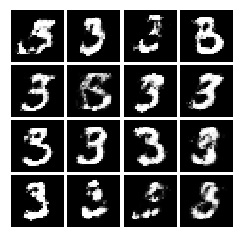

In [91]:
n_sample = 16
z_sample = sample_Z(n_sample, z_dimension)
y_sample = np.zeros(shape=[n_sample, y_dimension])
y_sample[:, 3] = 1

samples = sess.run(g_sample, feed_dict={Z: z_sample, Y:y_sample})

fig = plot(samples)
plt.show()

In [89]:
plt.imshow(mnist.train.images[0].reshape(28,28),cmap='gray')

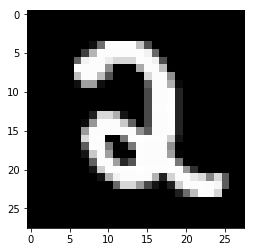

In [90]:
plt.show()